## Instructions to submit the assignment

- This is an individual assessment. Refrain from working in groups. We will use plagiarism detectors after the submission. So, do not engage in unethical activities.
- Name your jupyter notebook before the submission as `Assignment1_[StudentID].ipynb`. For instance: `Assignment1_A0123873A.ipynb`.
- Your solution notebook must contain the python code that we can run to verify the answers.
- Please submit the final and clean version of the code.
- Upload your jupyter notebook on Canvas in the *Assignment 1*. **The assignment will close at 10am on 23/09/2023**. Late submissions will receive a penalty on the grade as follows:
  - late within 1 hour: 10% reduction in grade
  - late within 6 hours: 30% reduction in grade
  - late within 12 hours: 50% reduction in grade
  - late within 1 days: 70% reduction in grade
  - after 1 days: zero mark

The datasets for the assignment are available [here](https://canvas.nus.edu.sg/courses/46169/files/2348280?wrap=1) . Please download them before you work on the assignment.

# Assignment 1: HDB Resale Flat Prices

With more than 1 million flats spread across 24 towns and 3 estates, the Singapore brand of public housing is uniquely different. The flats spell home for over 80% of Singapore's resident population, of which, about 90% own their home.

Data.gov is a repository of many datasets that are made available by different public service bodies in Singapore. In this assignment we will work on [HDB Resale Price](https://data.gov.sg/dataset/resale-flat-prices) available through the same datastore. It houses the resale price data from January 1990 to December 2023 on a monthly basis.

In this assignment, we will focus on the resale records from 2020 to 2023. We want to explore if the distance from the MRT station has any impact on the resale price.

## Loading the data

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

In [117]:
#to be removed
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145518 entries, 0 to 145517
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                145518 non-null  object 
 1   town                 145518 non-null  object 
 2   flat_type            145518 non-null  object 
 3   block                145518 non-null  object 
 4   street_name          145518 non-null  object 
 5   storey_range         145518 non-null  object 
 6   floor_area_sqm       145518 non-null  float64
 7   flat_model           145518 non-null  object 
 8   lease_commence_date  145518 non-null  int64  
 9   remaining_lease      145518 non-null  object 
 10  resale_price         145518 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 12.2+ MB
None


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [118]:
# data.street_name.unique()

In [119]:
data['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [120]:
data['month'].unique()

array(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
       '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01'], dtype=object)

In [121]:
data['month'] = pd.to_datetime(data['month'])
data['year'] = data['month'].dt.year
data.groupby(['year','flat_type']).count().month

year  flat_type       
2017  1 ROOM                  9
      2 ROOM                219
      3 ROOM               5047
      4 ROOM               8604
      5 ROOM               5002
      EXECUTIVE            1624
      MULTI-GENERATION        4
2018  1 ROOM                  9
      2 ROOM                286
      3 ROOM               5119
      4 ROOM               8769
      5 ROOM               5487
      EXECUTIVE            1876
      MULTI-GENERATION       15
2019  1 ROOM                 11
      2 ROOM                414
      3 ROOM               5423
      4 ROOM               9228
      5 ROOM               5427
      EXECUTIVE            1669
      MULTI-GENERATION       14
2020  1 ROOM                 10
      2 ROOM                418
      3 ROOM               5384
      4 ROOM               9647
      5 ROOM               5984
      EXECUTIVE            1882
      MULTI-GENERATION        8
2021  1 ROOM                  9
      2 ROOM                385
      3 ROOM     

## Question 1: Data Preprocessing

We want to work with a subset of the available dataset. Please perform the following operations to choose and preprocess the desired subset.

- Create a new column, named `year`, that isolates year of purchase from the date of resale.
- Select the data from year **2019 to 2022**. *(We will only use this subset for the entire assignment. 2023 does not have sufficient data.)*
- Drop the records with EXECUTIVE and MULTI-GENERATION `flat_type`s.
- Drop the records in the CENTRAL AREA and BUKIT TIMAH `town`.
- Create a new column, named `price_per_sqm`, that computes the resale price of the flat per square meter of the area.
- Drop the following columns: `storey_range`, `flat_model`, `resale_price`, `floor_area_sqm`.

Note: Further questions work on this preprocessed dataset.

<div align="right"> (3 points) </div>

In [122]:
# Create a new column, named year, that isolates year of purchase from the date of resale.
data['month'] = pd.to_datetime(data['month'])
data['year'] = data['month'].dt.year
# Select the data from year 2019 to 2022. (We will only use this subset for the entire assignment. 2023 does not have sufficient data.)
data = data[(data['year'] >= 2019) & (data['year'] <= 2022)]
# Drop the records with EXECUTIVE and MULTI-GENERATION flat_types.
data = data[~data['flat_type'].isin(['MULTI-GENERATION', 'EXECUTIVE'])]
# Drop the records in the CENTRAL AREA and BUKIT TIMAH town.
#data = data[~data['town'].isin(['CENTRAL AREA', 'BUKIT TIMAH'])]
#Create a new column, named price_per_sqm, that computes the resale price of the flat per square meter of the area.
data['price_per_sqm'] = data['resale_price'] / data['floor_area_sqm']
#Drop the following columns: storey_range, flat_model, resale_price, floor_area_sqm.
data = data.drop(columns = ['storey_range','flat_model', 'resale_price', 'floor_area_sqm'])


We observe that the `remaining_lease` feature has multiple missing values. We can impute the missing values and ensure that the dataframe does not contain any missing value.

*What is the lease period of every HDB flat in Singapore? [ Find out here.](https://www.gov.sg/article/do-i-really-own-my-hdb-flat)*

In [123]:
data['remaining_lease'] = (99 + data['lease_commence_date']) - data['year']

## Question 2: Data Augmentation

Since we are interested in the distance from the MRT station, we need the geolocations of the HDBs as well as MRT stations.

A quick search on Google gives us [this](https://www.kaggle.com/datasets/mylee2009/singapore-postal-code-mapper) publicly available dataset on Kaggle. We have downloaded this dataset and pre-processed it for you. *(To get a taste of preprocessing, you can try downloading it and cleaning it. You will realise that it is not a obvious task to even understand why cleaning is needed at the outset. You will have to really dive deeper to understand it.)*

- Load this dataset in a dataframe `hdb_locations`.
- Create a new dataframe, named `imputed_dataset`, by merging `hdb_locations` dataset with our `resale_dataset`. (Validate that the `imputed_dataset` has as many records as the `resale_dataset`.)
- Drop all records with NaN values in the `imputed_dataset`. They are manifested due to incomplete `hdb_locations` dataset. We are okay to sacrifice a few records.

<div align="right"> (3 points) </div>

In [124]:
hdb_count = hdb_locations.groupby(by = ['RD_name','blk_no']).count()
duplicated_hdb_locations = hdb_count[hdb_count['latitude'] == 2]     
duplicated_hdb_locations

,,latitude,longitude
RD_name,blk_no,,


In [125]:
hdb_locations.drop_duplicates().shape, hdb_locations.shape 

((25165, 4), (25165, 4))

In [126]:
duplicate_rows = hdb_locations.duplicated()
hdb_locations[duplicate_rows]

,blk_no,RD_name,latitude,longitude


In [127]:
hdb_locations[(hdb_locations['RD_name'] == 'BEDOK RESERVOIR VIEW') & (hdb_locations['blk_no'] == '13')]

,blk_no,RD_name,latitude,longitude
4531,13,BEDOK RESERVOIR VIEW,1.337931,103.936531


In [128]:
hdb_locations = pd.read_csv("sg_zipcode_mapper_utf.csv")
hdb_locations[(hdb_locations['RD_name'] == 'BEACH RD') & (hdb_locations['blk_no'] == '15')]

,postal,latitude,longtitude,searchval,blk_no,RD_name,building,address,postal.1
4862,189677,1.295817,103.855503,BEACH CENTRE,15,BEACH RD,BEACH CENTRE,15 BEACH RD BEACH CENTRE SINGAPORE 189677,189677
8909,190015,1.303425,103.863153,GOLDEN BEACH VISTA,15,BEACH RD,GOLDEN BEACH VISTA,15 BEACH RD GOLDEN BEACH VISTA SINGAPORE 190015,190015


In [129]:
hdb_locations = pd.read_csv("sg_zipcode_mapper_utf.csv")
resale_dataset = data 
# data clearning for hdb_locations 
hdb_locations = hdb_locations.rename(columns={'longtitude': 'longitude'}) 
hdb_locations = hdb_locations[['blk_no', 'RD_name', 'latitude', 'longitude']] 
hdb_locations = hdb_locations.drop_duplicates(subset = ['blk_no', 'RD_name'], keep='first') #drop the duplicate data in hdb_locations 

#merge data
imputed_dataset = pd.merge(resale_dataset, hdb_locations, left_on = ['street_name', 'block'], right_on = ['RD_name', 'blk_no'], how = 'left')
print(resale_dataset.shape[0], imputed_dataset.shape[0]) 
imputed_dataset = imputed_dataset[~imputed_dataset['RD_name'].isnull()]
print(imputed_dataset.shape[0])

93599 93599
64282


In [130]:
#delete
hdb_locations.RD_name.unique()

hdb_locations.head()

,blk_no,RD_name,latitude,longitude
0,1,LORONG 24 GEYLANG,1.312763,103.883519
1,1,LORONG 20 GEYLANG,1.312390,103.881504
2,1,BENOI RD,1.309135,103.679463
3,1,BOSCOMBE RD,1.305466,103.895674
4,1,BUKIT BATOK ST 22,1.344619,103.749789


In [131]:
imputed_dataset.head()

,month,town,flat_type,block,street_name,lease_commence_date,remaining_lease,year,price_per_sqm,blk_no,RD_name,latitude,longitude
0,2019-01-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,3432.835821,225,ANG MO KIO AVE 1,1.367396,103.838150
1,2019-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3916.666667,174,ANG MO KIO AVE 4,1.375097,103.837619
2,2019-01-01,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,1979,59,2019,3552.238806,440,ANG MO KIO AVE 10,1.366428,103.854311
3,2019-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3934.426230,174,ANG MO KIO AVE 4,1.375097,103.837619
4,2019-01-01,ANG MO KIO,3 ROOM,637,ANG MO KIO AVE 6,1980,60,2019,3529.411765,637,ANG MO KIO AVE 6,1.380362,103.842335


## Question 3: Finding the Nearest MRT station

We need geolocations of the MRT stations to locate the nearest station to the HDB. A quick search on Google gives us [this](https://www.kaggle.com/datasets/yxlee245/singapore-train-station-coordinates) publicly available dataset on Kaggle. We have downloaded the dataset for you. We have dropped the stations on LRT.

In [132]:
mrt_locations = pd.read_csv("mrt_data.csv")
mrt_locations.drop(columns=['type'], inplace=True)

In [133]:
mrt_locations

,station_name,lat,lng
0,Jurong East,1.333207,103.742308
1,Bukit Batok,1.349069,103.749596
2,Bukit Gombak,1.359043,103.751863
3,Choa Chu Kang,1.385417,103.744316
4,Yew Tee,1.397383,103.747523
...,...,...,...
114,Bedok North,1.335268,103.918054
115,Bedok Reservoir,1.336595,103.933070
116,Tampines West,1.345583,103.938244
117,Tampines East,1.356310,103.955471


Using Euclidean distance between two geolocation offers us a false notion of the distance. Euclidean distance is meant for the flat space; which Earth isn't (thanks to Greek geographer Eratosthenes!).

We have provided you the following function to compute the distance between to geolocations.

In [134]:
from math import sin, cos, sqrt, atan2, radians

def earth_distance(x, y):

  # Approximate radius of earth in km
  R = 6373.0

  lat1, lng1 = radians(x[0]), radians(x[1])
  lat2, lng2 = radians(y[0]), radians(y[1])

  dlon = lng2 - lng1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  return R * c

def euclidean_distance(x, y):
  dx = x[0] - y[0]
  dy = x[1] - y[1]

  return sqrt(dx**2 + dy**2)

jurong_east = [1.333207, 103.742308]
near_amk = [1.365445, 103.842715]
print("Euclidean distance: ", euclidean_distance(jurong_east, near_amk))
print("Realistic distance: ", earth_distance(jurong_east, near_amk))

Euclidean distance:  0.10545546118149039
Realistic distance:  11.726844638513933


Create two columns in the `imputed_dataset` dataframe.
- Column `nearest_mrt` that lists the name of the MRT station nearest to the resale record.
- Column `mrt_dist` that lists the distance from the nearest MRT station.

**Hint.** *Use [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to efficiently do this task.*

<div align="right"> (3 points) </div>

In [135]:
mrt_locations[['lat', 'lng']]

,lat,lng
0,1.333207,103.742308
1,1.349069,103.749596
2,1.359043,103.751863
3,1.385417,103.744316
4,1.397383,103.747523
...,...,...
114,1.335268,103.918054
115,1.336595,103.933070
116,1.345583,103.938244
117,1.356310,103.955471


In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances

mrt_locations = mrt_locations.rename(columns={'lat': 'latitude', 'lng': 'longitude'})
X, y = mrt_locations[['latitude', 'longitude']], mrt_locations['station_name']

In [137]:
knn = KNeighborsClassifier(n_neighbors=1, metric=earth_distance)
knn.fit(X, y)
imputed_dataset['nearest_mrt'] = knn.predict(imputed_dataset[['latitude','longitude']]) 
distances, indices = knn.kneighbors(imputed_dataset[['latitude','longitude']])
imputed_dataset['mrt_dist'] = distances

In [138]:
imputed_dataset.head()

,month,town,flat_type,block,street_name,lease_commence_date,remaining_lease,year,price_per_sqm,blk_no,RD_name,latitude,longitude,nearest_mrt,mrt_dist
0,2019-01-01,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,1978,58,2019,3432.835821,225,ANG MO KIO AVE 1,1.367396,103.838150,Ang Mo Kio,1.305063
1,2019-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3916.666667,174,ANG MO KIO AVE 4,1.375097,103.837619,Yio Chu Kang,1.099849
2,2019-01-01,ANG MO KIO,3 ROOM,440,ANG MO KIO AVE 10,1979,59,2019,3552.238806,440,ANG MO KIO AVE 10,1.366428,103.854311,Ang Mo Kio,0.660276
3,2019-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,1986,66,2019,3934.426230,174,ANG MO KIO AVE 4,1.375097,103.837619,Yio Chu Kang,1.099849
4,2019-01-01,ANG MO KIO,3 ROOM,637,ANG MO KIO AVE 6,1980,60,2019,3529.411765,637,ANG MO KIO AVE 6,1.380362,103.842335,Yio Chu Kang,0.327413


In [139]:
imputed_dataset.describe()

,lease_commence_date,remaining_lease,year,price_per_sqm,latitude,longitude,mrt_dist
count,64282.000000,64282.000000,64282.000000,64282.000000,64282.000000,64282.000000,64282.000000
mean,1996.536340,74.945926,2020.590414,5034.050693,1.368979,103.846405,0.831441
std,14.258391,14.225283,1.096608,1378.448007,0.040200,0.070804,0.466513
min,1967.000000,44.000000,2019.000000,2089.552239,1.270380,103.685234,0.012317
25%,1985.000000,63.000000,2020.000000,4148.148148,1.339895,103.791457,0.484350
50%,1996.000000,74.000000,2021.000000,4760.600072,1.370189,103.850766,0.737422
75%,2013.000000,91.000000,2022.000000,5535.641791,1.394827,103.898852,1.077788
max,2019.000000,98.000000,2022.000000,14731.182796,1.457071,103.987805,3.440571


## Question 4: Data Visualisation

The resale price of the HDB equally depends on the remaining lease. People tend to buy newer HDBs than the ones that would soon go for re-development.

Write a script that shows a scatter-plot of `price_per_sqm` against `remaining_lease`. Do you observe a positive correlation?

<div align="right"> (1 point) </div>

There is a positive correlation. From the graph, the correlation between reminaing lease and price per square meter after the remianing lease exceeds 80 years. 

<Axes: xlabel='remaining_lease', ylabel='price_per_sqm'>

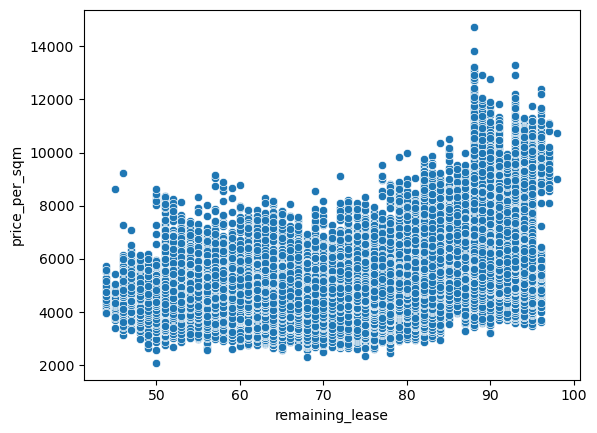

In [140]:
sns.scatterplot(y = 'price_per_sqm', x = 'remaining_lease', data = imputed_dataset)

In [141]:
imputed_dataset['price_per_sqm'].corr(imputed_dataset['remaining_lease'])

0.39735107118175467

We also want to see the variation of resale price across different towns.

Write a script that shows the boxplot of `price_per_sqm` against varius `town`s. All towns should be listed in alphabetical order on the x-axis.

<div align="right"> (1 point) </div>

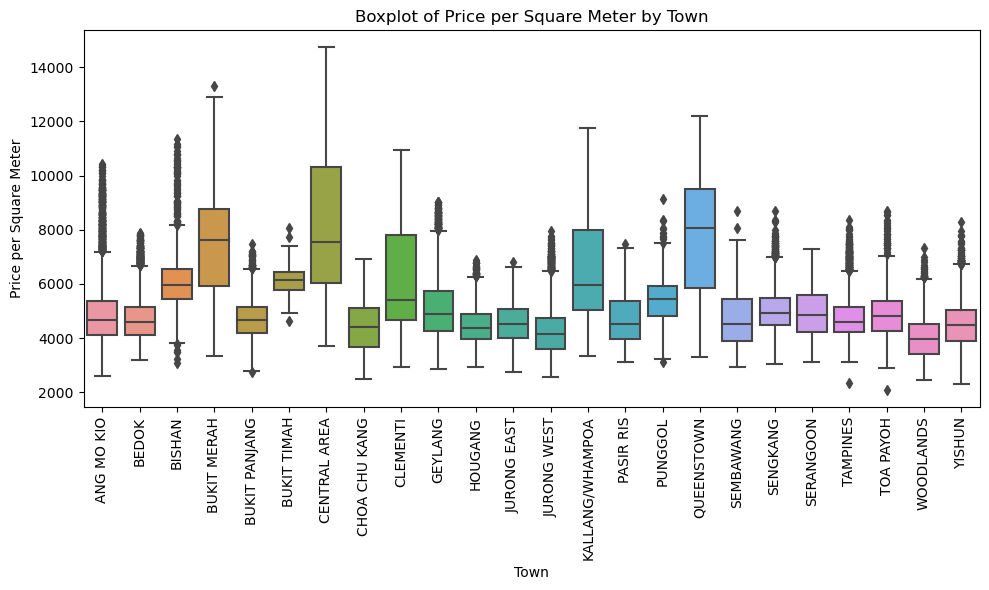

In [142]:
towns = sorted(imputed_dataset['town'].unique())

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='town', y='price_per_sqm', data=imputed_dataset, order=towns)
plt.xticks(rotation=90)
plt.xlabel('Town')
plt.ylabel('Price per Square Meter')
plt.title('Boxplot of Price per Square Meter by Town')
plt.tight_layout()
plt.show()

We want to observe the number of different `flat_type` that are sold over the last four years.

Write a script that would generate a plot that looks as follows.

<div align="right"> (2 points) </div>

<img src="https://www.comp.nus.edu.sg/~ashishd/IT5006/Assignments/Assignment_1/flat_type.png" alt="flat_type" width="500"/>

In [143]:
imputed_dataset.loc[imputed_dataset['year'] == 2019,'flat_type']

0        3 ROOM
1        3 ROOM
2        3 ROOM
3        3 ROOM
4        3 ROOM
          ...  
20498    5 ROOM
20499    5 ROOM
20500    5 ROOM
20501    5 ROOM
20502    5 ROOM
Name: flat_type, Length: 14010, dtype: object

In [144]:
list(range(2019,2023))

[2019, 2020, 2021, 2022]

In [145]:
imputed_dataset.groupby(by = ['year']).town.count()

year
2019    14010
2020    15177
2021    18227
2022    16868
Name: town, dtype: int64

In [146]:
imputed_dataset.groupby(by = ['year','flat_type']).town.count()

year  flat_type
2019  2 ROOM        203
      3 ROOM       3638
      4 ROOM       6391
      5 ROOM       3778
2020  2 ROOM        220
      3 ROOM       3715
      4 ROOM       7083
      5 ROOM       4159
2021  2 ROOM        209
      3 ROOM       4132
      4 ROOM       8638
      5 ROOM       5248
2022  2 ROOM        276
      3 ROOM       4262
      4 ROOM       7733
      5 ROOM       4597
Name: town, dtype: int64

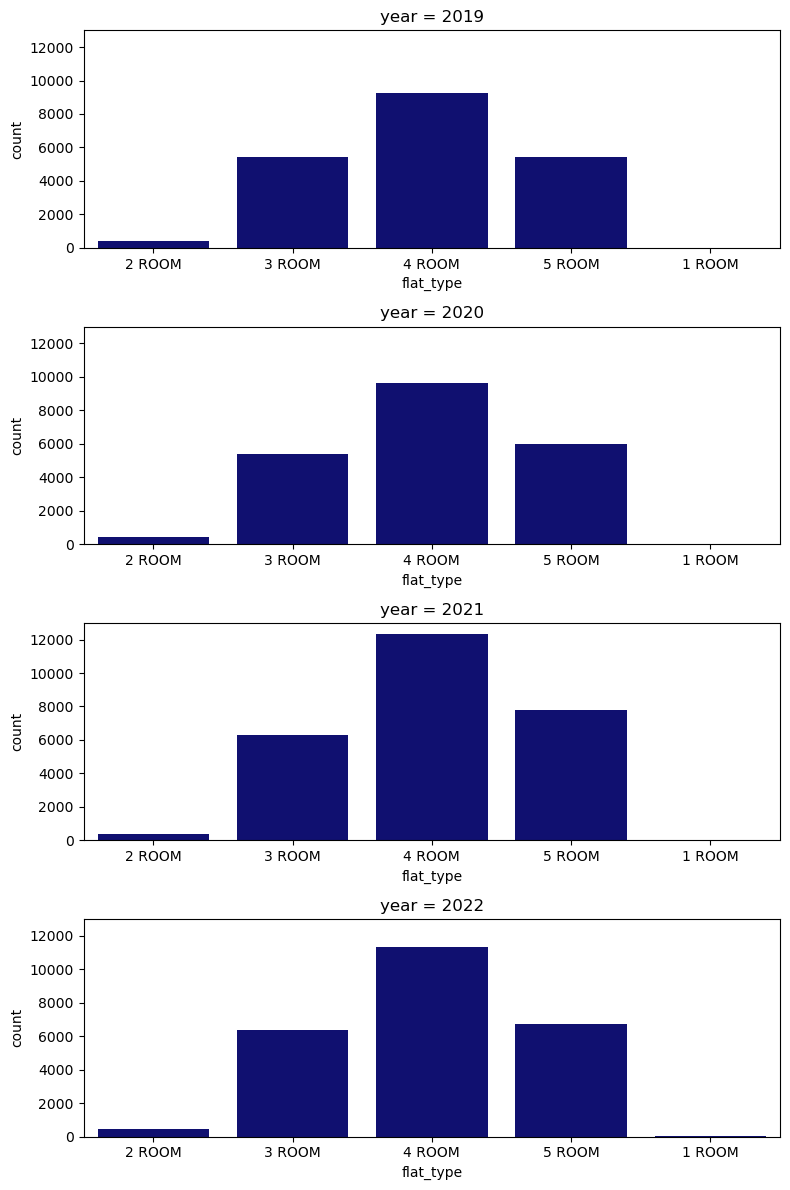

In [147]:
fig, axes = plt.subplots(4, 1, figsize=(8, 12))

def count_subplot(years): 
    i = 0 
    x_order = ['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '1 ROOM']
    for year in years: 
        plt_data = resale_dataset.loc[resale_dataset['year'] == year,'flat_type']
        sns.countplot(x = plt_data, ax=axes[i], order = x_order, color = 'navy')
        axes[i].set_ylim(0,13000)
        axes[i].set_title('year = %s' %year)
        i += 1 
    plt.tight_layout()
    plt.show()
count_subplot(years = list(range(2019,2023)))

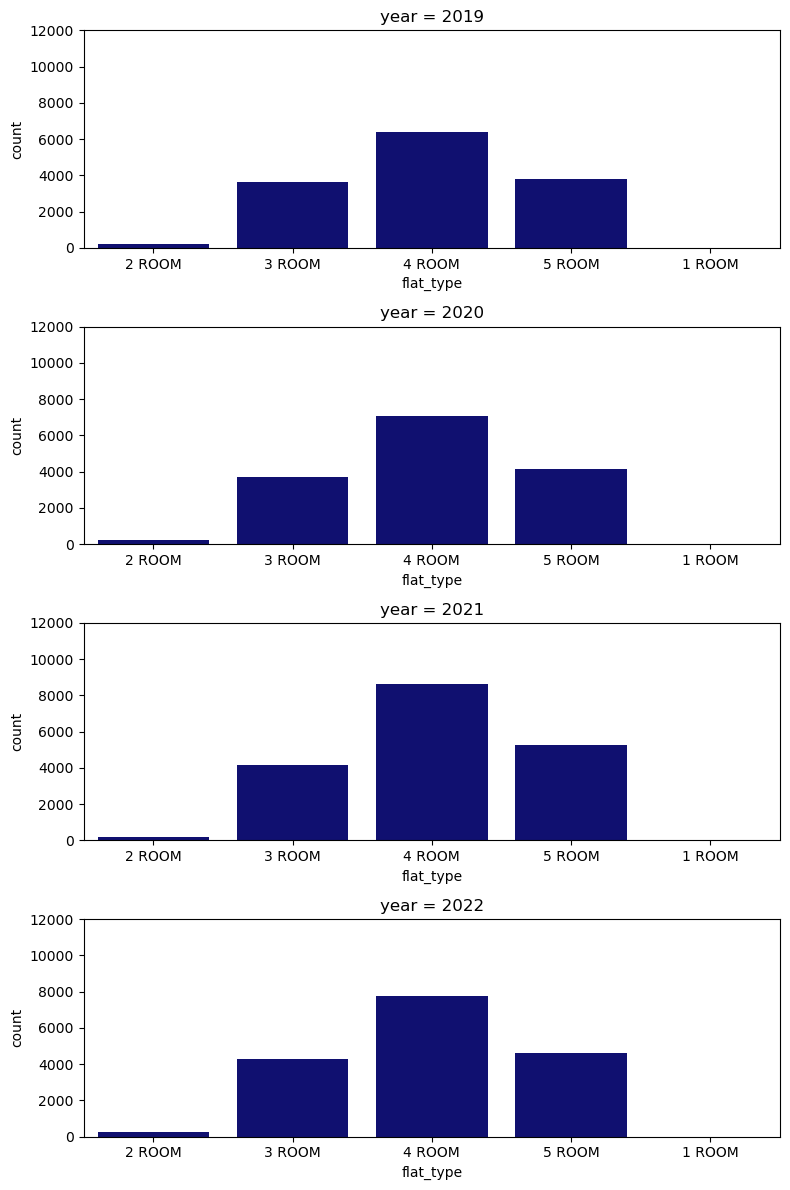

In [148]:
fig, axes = plt.subplots(4, 1, figsize=(8, 12))

def count_subplot(years): 
    i = 0 
    x_order = ['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '1 ROOM']
    for year in years: 
        plt_data = imputed_dataset.loc[imputed_dataset['year'] == year,'flat_type']
        sns.countplot(x = plt_data, ax=axes[i], order = x_order, color = 'navy')
        axes[i].set_ylim(0,12000)
        axes[i].set_title('year = %s' %year)
        i += 1 
    plt.tight_layout()
    plt.show()
count_subplot(years = list(range(2019,2023)))

We want to observe the correlation between the resale price and the distance from the nearest MRT station.

Write a script that would generate a plot that looks as follows.

<div align="right"> (2 points) </div>

<img src="https://www.comp.nus.edu.sg/~ashishd/IT5006/Assignments/Assignment_1/price_mrt.png" alt="flat_type" width="800"/>

In [149]:
imputed_dataset.loc[imputed_dataset['town'] == 'abc',('flat_type', 'price_per_sqm')]

,flat_type,price_per_sqm


In [150]:
fig, axes = plt.subplots(5, 5, figsize=(24, 24))

def scatter_subplot(towns): 
    i = 0 
    j = 0 
    for town in towns: 
        plt_data = imputed_dataset.loc[imputed_dataset['town'] == town,('mrt_dist', 'price_per_sqm')]
        sns.scatterplot(x = 'mrt_dist', y = 'price_per_sqm', data = plt_data, ax=axes[i][j], color = 'navy')
        axes[i][j].set_ylim(1000,13000)
        axes[i][j].set_xlim(-0.2,4)
        axes[i][j].set_title('town = %s' %town)
        if j < 4:
            j += 1
        else:
            j = 0
            i += 1
    plt.tight_layout()
    plt.show(
scatter_subplot(list(imputed_dataset.town.unique()))

SyntaxError: incomplete input (3229587912.py, line 19)

## Question 5: Analysis

Which town shows the highest variability in the `price_per_sqm` in the last four years?

<div align="right"> (1 point) </div>

*Right your answer here.*
QUEENSTOWN has the highest variance of price per sqauare meter, which is 4,181,122.

In [ ]:
imputed_dataset[['price_per_sqm', 'town']].groupby(by = 'town').var().sort_values(by = 'price_per_sqm', ascending = False).head()

Which observation do you make looking at the resale records as per the `flat_type` over the years? What is a probable reason for the pattern that you observe?

<div align="right">(2 points)</div>

*Right your answer here.*

- *Observation(s).*
- *Probable reason(s).*

We can observe that for many towns (such as Clementi, Bukit Merah, Pasir Ris, etc.) the `price_per_sqm` has a -ve correlation to the `mrt_dist`. This fits our hypothesis.

But some towns tend to show counter-intuitive behaviour. Please provide possible reasons behind these observation. You may support your answers by further analysing the available data.

- We observe a strong positive correlation for Sembawang (which means the houses closer to MRT are cheaper than the ones that are farther!). What is a probable reason?

- We observe two distinct clusters in the plot of Sengkang and Serangoon. What is a probable reason?
<div align="right">(2 points)</div>

*Right your answer here.*

- *Probable reason for Obs 1.*
- *Probable reason for Obs 2.*